### **1. Operator Sobel Grayscale**

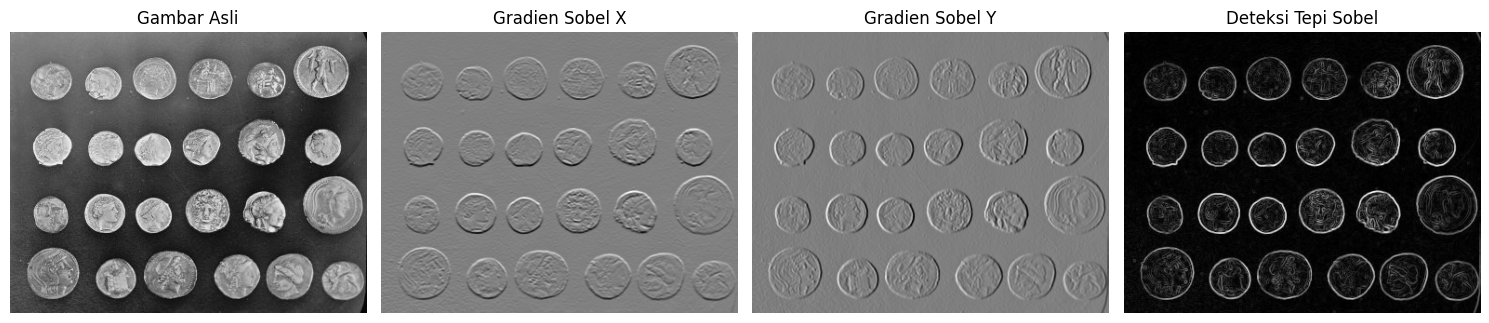

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters

# Ambil gambar bawaan dari skimage
image = data.coins()  # Menggunakan gambar koin bawaan dari skimage
gray_image = color.rgb2gray(image) if image.ndim == 3 else image  # Konversi ke grayscale jika perlu

# Hitung gradien menggunakan Operator Sobel
sobel_x = filters.sobel_h(gray_image)  # Gradien di arah horizontal
sobel_y = filters.sobel_v(gray_image)  # Gradien di arah vertikal
sobel_edge = filters.sobel(gray_image)  # Kombinasi keduanya

# Visualisasi hasil
fig, axes = plt.subplots(1, 4, figsize=(15, 5))
ax = axes.ravel()

ax[0].imshow(gray_image, cmap='gray')
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(sobel_x, cmap='gray')
ax[1].set_title("Gradien Sobel X")
ax[1].axis("off")

ax[2].imshow(sobel_y, cmap='gray')
ax[2].set_title("Gradien Sobel Y")
ax[2].axis("off")

ax[3].imshow(sobel_edge, cmap='gray')
ax[3].set_title("Deteksi Tepi Sobel")
ax[3].axis("off")

plt.tight_layout()
plt.show()


### **2. Operator Sobel Color**

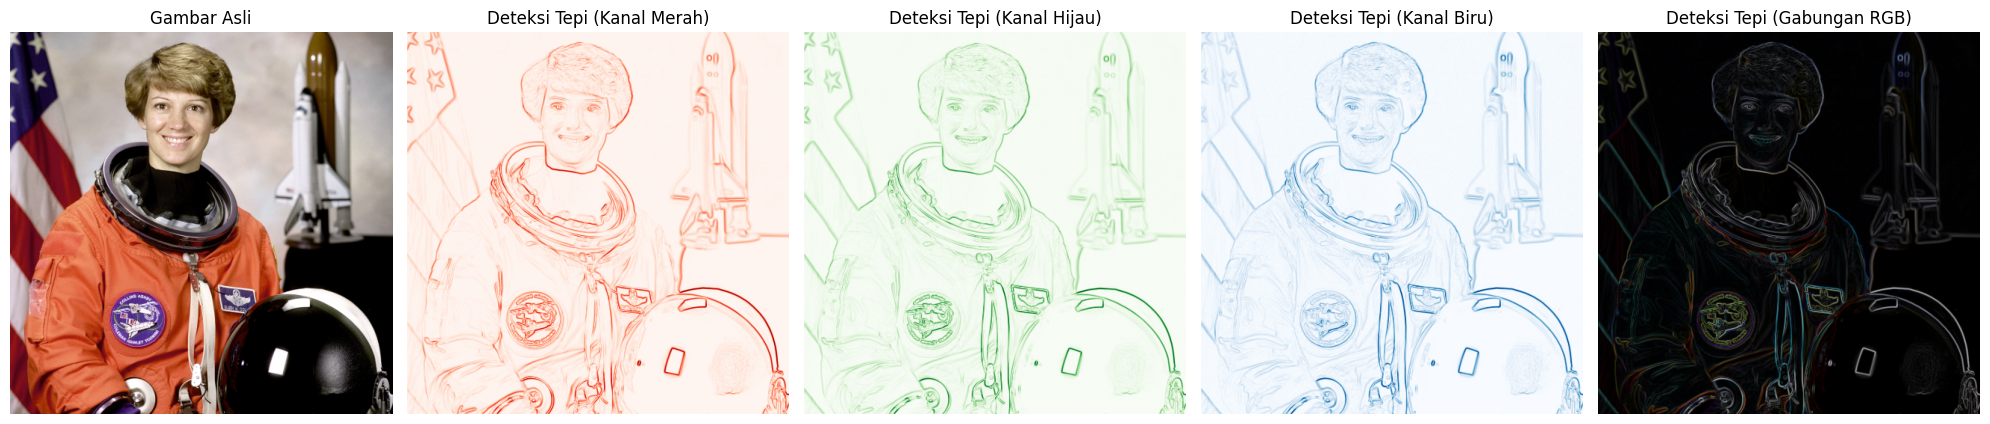

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters

# Ambil gambar bawaan dari skimage (gambar astronaut berwarna)
image = data.astronaut()

# Pisahkan kanal warna
red_channel = image[:, :, 0]  # Kanal merah
green_channel = image[:, :, 1]  # Kanal hijau
blue_channel = image[:, :, 2]  # Kanal biru

# Terapkan Operator Sobel pada masing-masing kanal warna
sobel_red = filters.sobel(red_channel)
sobel_green = filters.sobel(green_channel)
sobel_blue = filters.sobel(blue_channel)

# Gabungkan hasil dengan mengambil rata-rata dari ketiga kanal
sobel_color = np.stack((sobel_red, sobel_green, sobel_blue), axis=2)

# Visualisasi hasil
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
ax = axes.ravel()

ax[0].imshow(image)
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

ax[1].imshow(sobel_red, cmap='Reds')
ax[1].set_title("Deteksi Tepi (Kanal Merah)")
ax[1].axis("off")

ax[2].imshow(sobel_green, cmap='Greens')
ax[2].set_title("Deteksi Tepi (Kanal Hijau)")
ax[2].axis("off")

ax[3].imshow(sobel_blue, cmap='Blues')
ax[3].set_title("Deteksi Tepi (Kanal Biru)")
ax[3].axis("off")

ax[4].imshow(sobel_color)
ax[4].set_title("Deteksi Tepi (Gabungan RGB)")
ax[4].axis("off")

plt.tight_layout()
plt.show()


### **Operator Roberts**

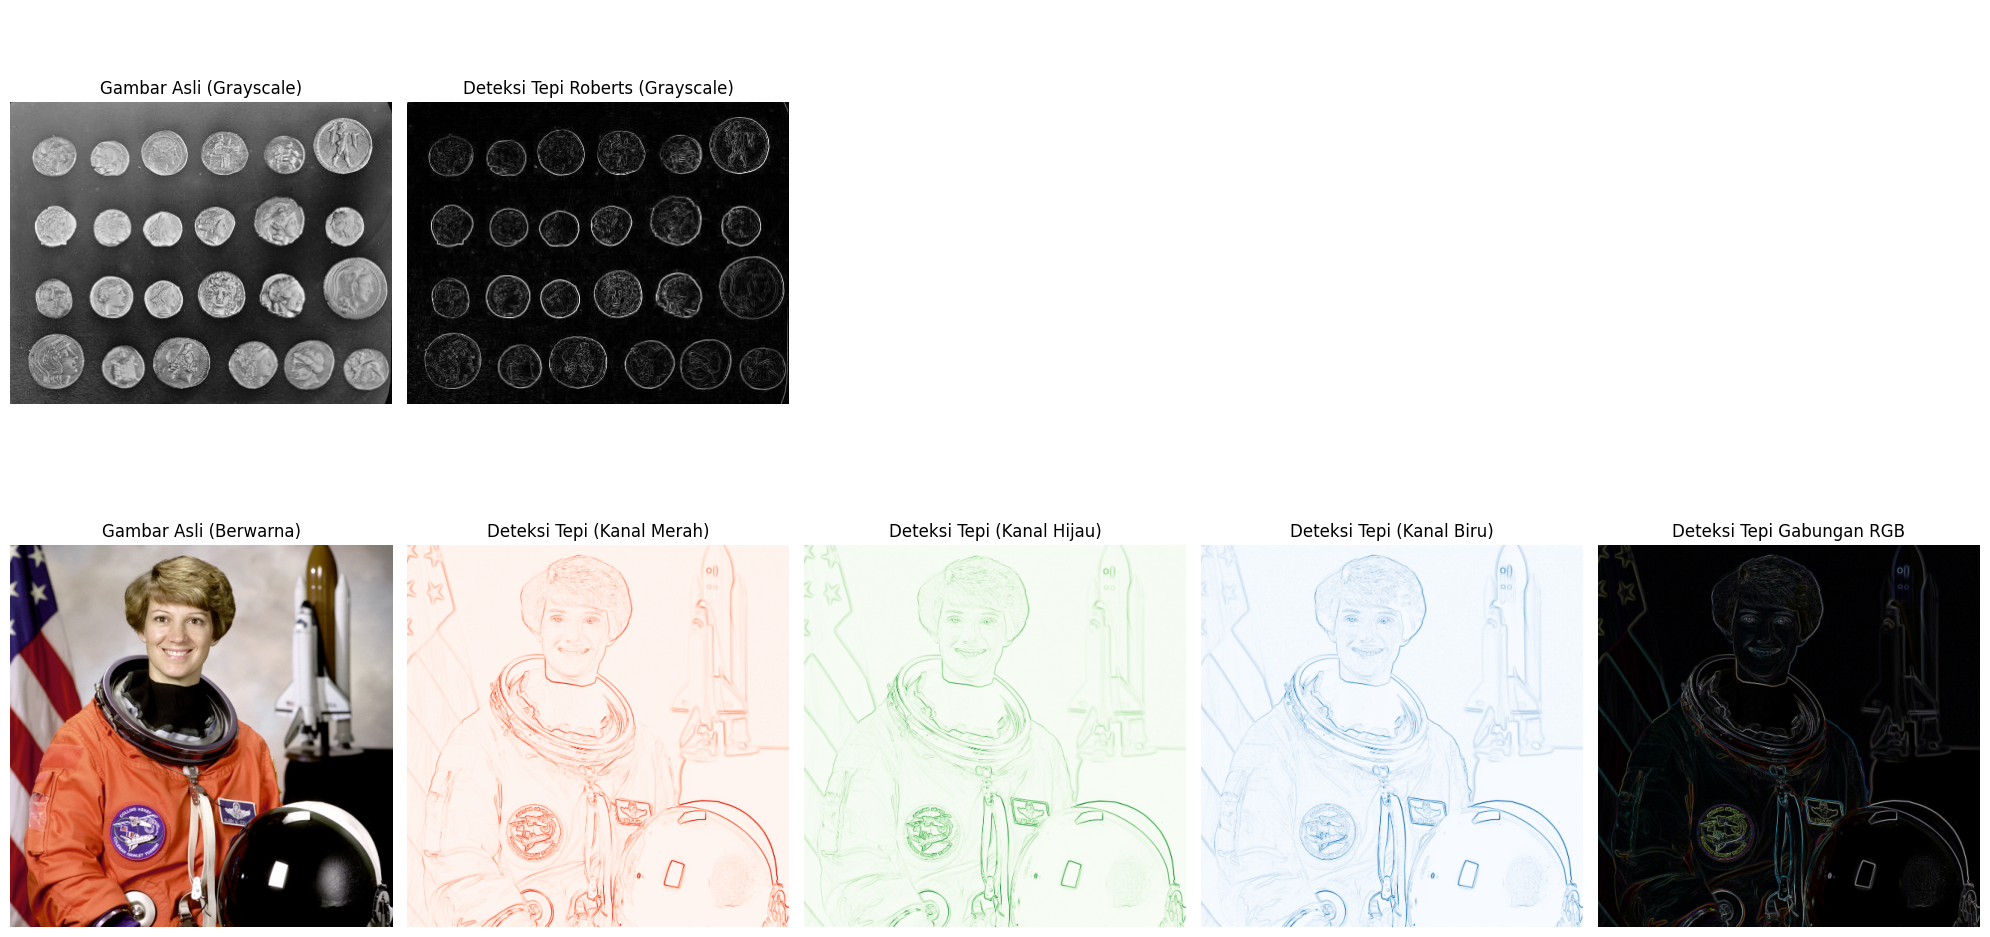

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters

# ===================== 1⃣ DETEKSI TEPI ROBERTS PADA CITRA GRAYSCALE =====================

# Ambil gambar grayscale dari skimage
image_gray = data.coins()  # Menggunakan gambar koin (grayscale)

# Terapkan Operator Roberts
roberts_gray = filters.roberts(image_gray)

# ===================== 2⃣ DETEKSI TEPI ROBERTS PADA CITRA BERWARNA =====================

# Ambil gambar berwarna dari skimage
image_color = data.astronaut()  # Menggunakan gambar astronaut (berwarna)

# Pisahkan kanal warna (R, G, B)
red_channel = image_color[:, :, 0]  # Kanal merah
green_channel = image_color[:, :, 1]  # Kanal hijau
blue_channel = image_color[:, :, 2]  # Kanal biru

# Terapkan Operator Roberts pada masing-masing kanal warna
roberts_red = filters.roberts(red_channel)
roberts_green = filters.roberts(green_channel)
roberts_blue = filters.roberts(blue_channel)

# Gabungkan hasil deteksi tepi dari ketiga kanal
roberts_color = np.stack((roberts_red, roberts_green, roberts_blue), axis=2)

# ===================== VISUALISASI HASIL =====================

fig, axes = plt.subplots(2, 5, figsize=(20, 10))
ax = axes.ravel()

# Baris 1: Citra Grayscale
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Gambar Asli (Grayscale)")
ax[0].axis("off")

ax[1].imshow(roberts_gray, cmap='gray')
ax[1].set_title("Deteksi Tepi Roberts (Grayscale)")
ax[1].axis("off")

# Kosongkan posisi 3, 4, dan 5 agar baris pertama rapi
for i in range(2, 5):
    ax[i].axis("off")

# Baris 2: Citra Berwarna
ax[5].imshow(image_color)
ax[5].set_title("Gambar Asli (Berwarna)")
ax[5].axis("off")

ax[6].imshow(roberts_red, cmap='Reds')
ax[6].set_title("Deteksi Tepi (Kanal Merah)")
ax[6].axis("off")

ax[7].imshow(roberts_green, cmap='Greens')
ax[7].set_title("Deteksi Tepi (Kanal Hijau)")
ax[7].axis("off")

ax[8].imshow(roberts_blue, cmap='Blues')
ax[8].set_title("Deteksi Tepi (Kanal Biru)")
ax[8].axis("off")

ax[9].imshow(roberts_color)
ax[9].set_title("Deteksi Tepi Gabungan RGB")
ax[9].axis("off")

plt.tight_layout()
plt.show()


### **4. Perbandingan deteksi tepi dengan beberapa operator (Sobel, Roberts, Prewitt, Kirsch, dan Canny) pada citra grayscale**

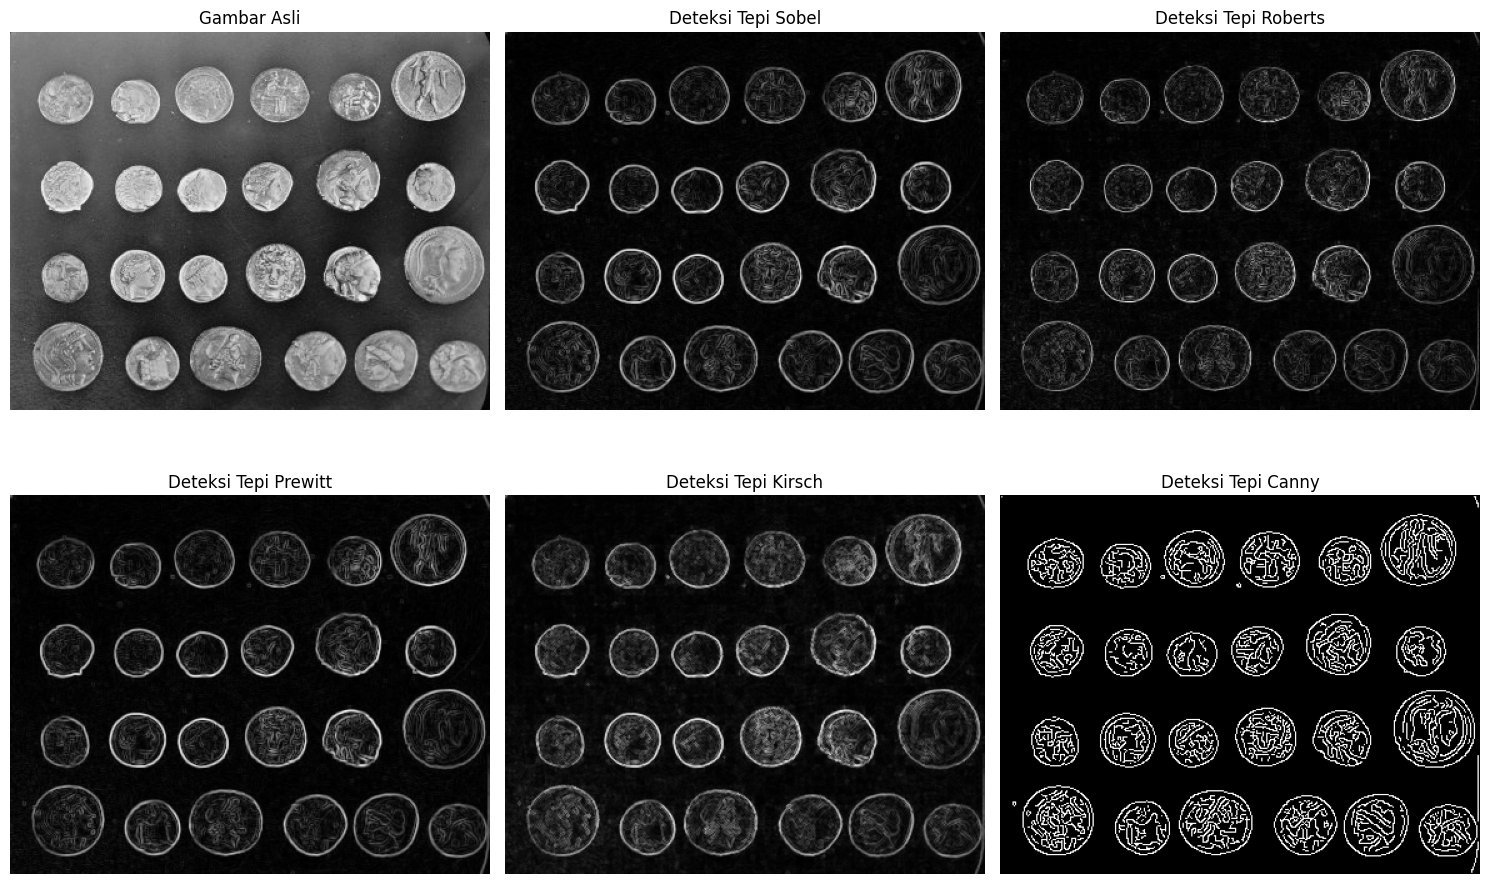

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, filters, feature
from skimage.filters.rank import gradient
from skimage.morphology import disk

# ===================== 1⃣ AMBIL GAMBAR GRAYSCALE =====================
# Menggunakan gambar koin dari skimage
image_gray = data.coins()  # Gambar grayscale

# ===================== 2⃣ TERAPKAN BERBAGAI OPERATOR DETEKSI TEPI =====================
# Operator Sobel
sobel_edge = filters.sobel(image_gray)

# Operator Roberts
roberts_edge = filters.roberts(image_gray)

# Operator Prewitt
prewitt_edge = filters.prewitt(image_gray)

# Operator Kirsch (Menggunakan filter gradien berbasis morfologi)
kirsch_edge = gradient(image_gray, disk(1))

# Operator Canny
canny_edge = feature.canny(image_gray, sigma=1)

# ===================== 3⃣ VISUALISASI HASIL =====================
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
ax = axes.ravel()

# Gambar asli
ax[0].imshow(image_gray, cmap='gray')
ax[0].set_title("Gambar Asli")
ax[0].axis("off")

# Sobel
ax[1].imshow(sobel_edge, cmap='gray')
ax[1].set_title("Deteksi Tepi Sobel")
ax[1].axis("off")

# Roberts
ax[2].imshow(roberts_edge, cmap='gray')
ax[2].set_title("Deteksi Tepi Roberts")
ax[2].axis("off")

# Prewitt
ax[3].imshow(prewitt_edge, cmap='gray')
ax[3].set_title("Deteksi Tepi Prewitt")
ax[3].axis("off")

# Kirsch
ax[4].imshow(kirsch_edge, cmap='gray')
ax[4].set_title("Deteksi Tepi Kirsch")
ax[4].axis("off")

# Canny
ax[5].imshow(canny_edge, cmap='gray')
ax[5].set_title("Deteksi Tepi Canny")
ax[5].axis("off")

plt.tight_layout()
plt.show()


### **5. Perbandingan deteksi tepi dengan beberapa operator (Sobel, Roberts, Prewitt, Kirsch, dan Canny) pada citra**

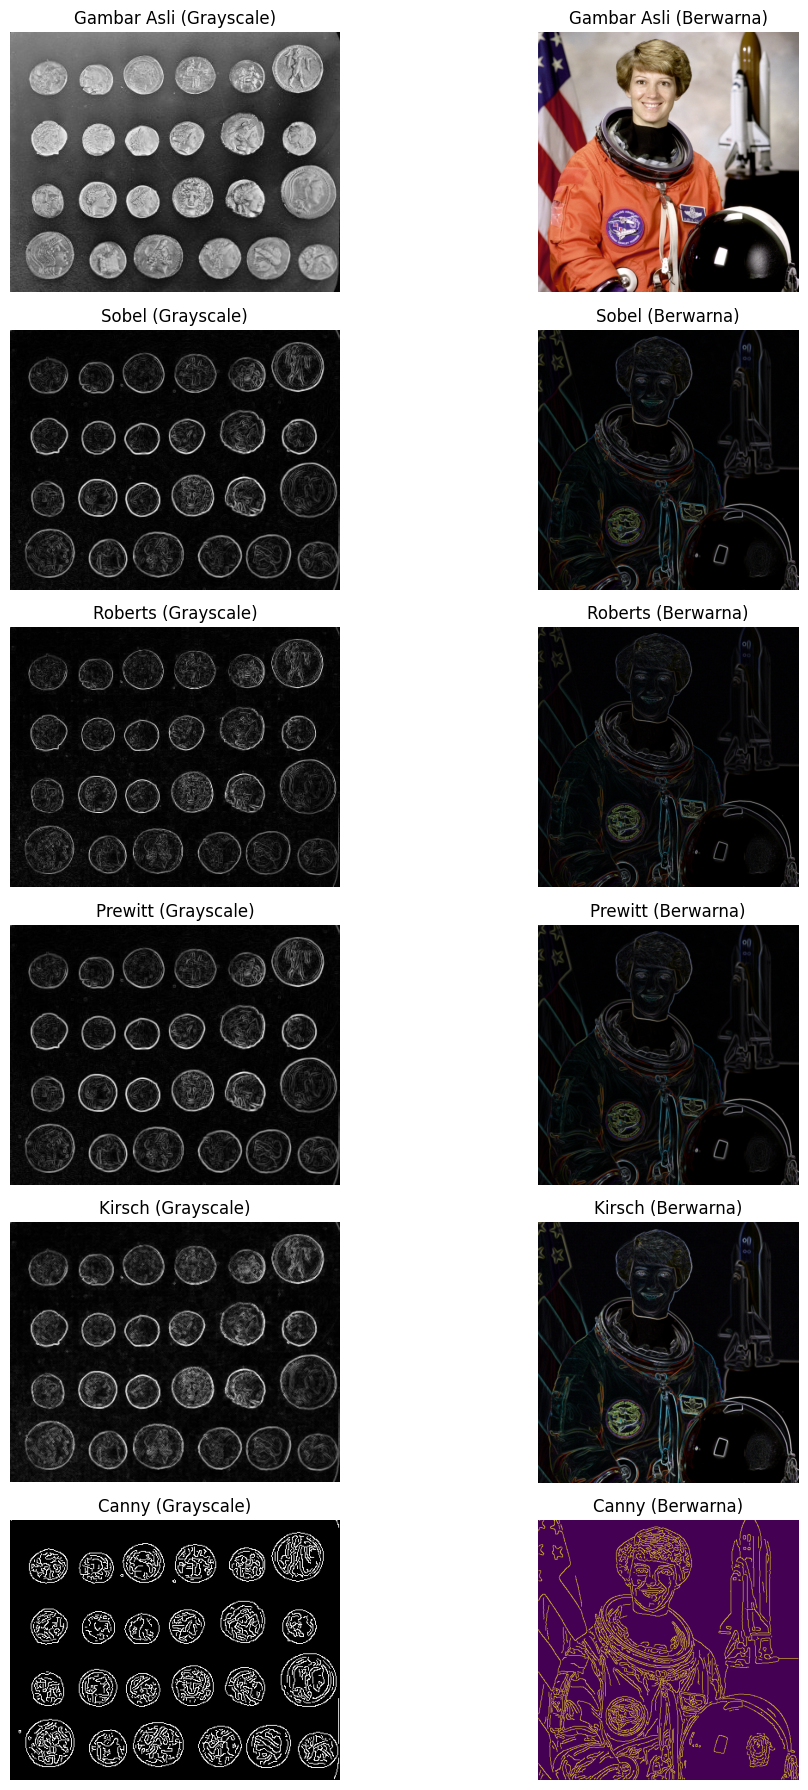

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data, color, filters, feature
from skimage.filters.rank import gradient
from skimage.morphology import disk

# ===================== 1⃣ AMBIL GAMBAR GRAYSCALE & BERWARNA =====================
# Menggunakan gambar bawaan dari skimage
image_gray = data.coins()  # Gambar grayscale
image_color = data.astronaut()  # Gambar berwarna

# ===================== 2⃣ TERAPKAN BERBAGAI OPERATOR DETEKSI TEPI =====================
# Fungsi untuk menerapkan deteksi tepi pada setiap kanal warna
def apply_edge_detection(image, operator):
    """Menerapkan operator deteksi tepi pada setiap kanal warna (R, G, B)."""
    red = operator(image[:, :, 0])
    green = operator(image[:, :, 1])
    blue = operator(image[:, :, 2])
    return np.stack((red, green, blue), axis=2)

# ----- Pada Gambar Grayscale -----
sobel_gray = filters.sobel(image_gray)
roberts_gray = filters.roberts(image_gray)
prewitt_gray = filters.prewitt(image_gray)
kirsch_gray = gradient(image_gray, disk(1))
canny_gray = feature.canny(image_gray, sigma=1)

# ----- Pada Gambar Berwarna (Per Kanal RGB) -----
sobel_color = apply_edge_detection(image_color, filters.sobel)
roberts_color = apply_edge_detection(image_color, filters.roberts)
prewitt_color = apply_edge_detection(image_color, filters.prewitt)
kirsch_color = apply_edge_detection(image_color, lambda img: gradient(img, disk(1)))
canny_color = feature.canny(color.rgb2gray(image_color), sigma=1)  # Canny hanya untuk grayscale

# ===================== 3⃣ VISUALISASI HASIL =====================
fig, axes = plt.subplots(6, 2, figsize=(12, 18))
ax = axes.ravel()

# Operator yang digunakan untuk visualisasi
titles = [
    "Sobel", "Roberts", "Prewitt", "Kirsch", "Canny"
]
grayscale_results = [sobel_gray, roberts_gray, prewitt_gray, kirsch_gray, canny_gray]
color_results = [sobel_color, roberts_color, prewitt_color, kirsch_color, canny_color]

# ----- Baris 1: Gambar Asli -----
ax[0].imshow(image_gray, cmap="gray")
ax[0].set_title("Gambar Asli (Grayscale)")
ax[0].axis("off")

ax[1].imshow(image_color)
ax[1].set_title("Gambar Asli (Berwarna)")
ax[1].axis("off")

# Loop untuk hasil deteksi tepi
for i, title in enumerate(titles):
    # Grayscale
    ax[2 + i * 2].imshow(grayscale_results[i], cmap="gray")
    ax[2 + i * 2].set_title(f"{title} (Grayscale)")
    ax[2 + i * 2].axis("off")
    
    # Berwarna
    ax[3 + i * 2].imshow(color_results[i])
    ax[3 + i * 2].set_title(f"{title} (Berwarna)")
    ax[3 + i * 2].axis("off")

plt.tight_layout()
plt.show()


### **5. Penugasan**

C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\IPython\core\interactiveshell.py:3579: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  exec(code_obj, self.user_global_ns, self.user_ns)


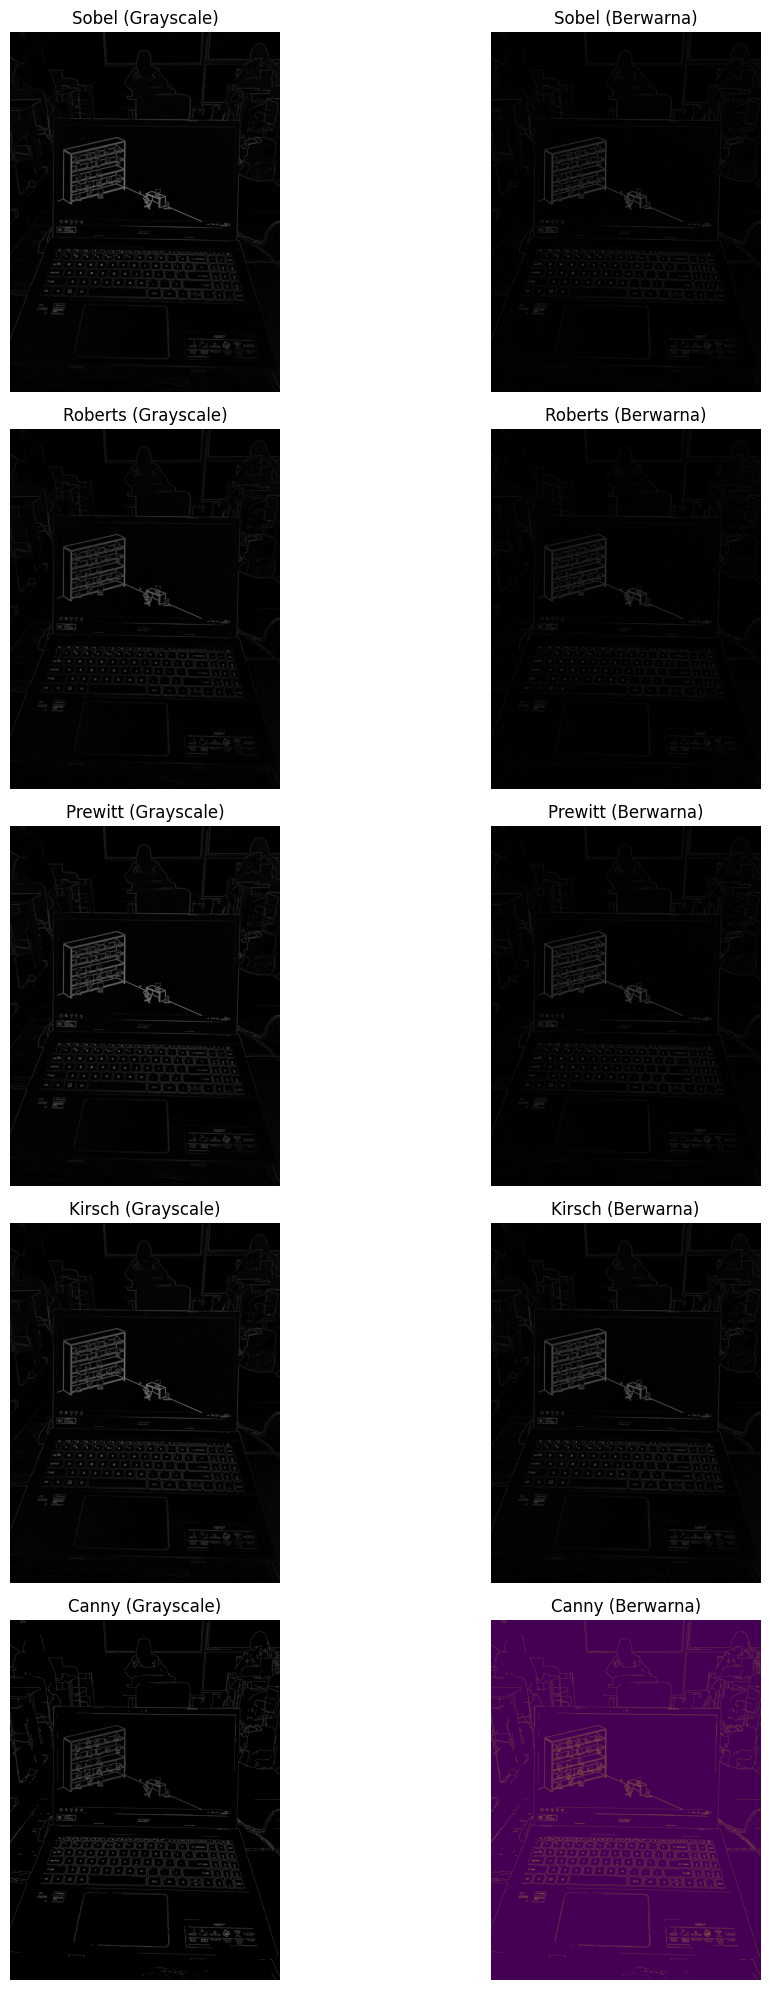

In [7]:
  import numpy as np
  import matplotlib.pyplot as plt
  from skimage import color, filters, feature
  from skimage.filters.rank import gradient
  from skimage.morphology import disk
  from skimage.io import imread

  # ===================== 1⃣ AMBIL GAMBAR DARI FILE =====================
  # Membaca gambar dari file eksternal
  image_color = imread("haydar.jpeg")  # Pastikan file "gambar.jpeg" berada di direktori yang sama
  image_gray = color.rgb2gray(image_color)  # Konversi gambar berwarna ke grayscale

  # ===================== 2⃣ TERAPKAN BERBAGAI OPERATOR DETEKSI TEPI =====================
  # Fungsi untuk menerapkan deteksi tepi pada setiap kanal warna
  def apply_edge_detection(image, operator):
      """Menerapkan operator deteksi tepi pada setiap kanal warna (R, G, B)."""
      red = operator(image[:, :, 0])
      green = operator(image[:, :, 1])
      blue = operator(image[:, :, 2])
      return np.stack((red, green, blue), axis=2)

  # ----- Pada Gambar Grayscale -----
  sobel_gray = filters.sobel(image_gray)
  roberts_gray = filters.roberts(image_gray)
  prewitt_gray = filters.prewitt(image_gray)
  kirsch_gray = gradient(image_gray, disk(1))
  canny_gray = feature.canny(image_gray, sigma=1)

  # ----- Pada Gambar Berwarna (Per Kanal RGB) -----
  sobel_color = apply_edge_detection(image_color, filters.sobel)
  roberts_color = apply_edge_detection(image_color, filters.roberts)
  prewitt_color = apply_edge_detection(image_color, filters.prewitt)
  kirsch_color = apply_edge_detection(image_color, lambda img: gradient(img, disk(1)))
  canny_color = feature.canny(color.rgb2gray(image_color), sigma=1)  # Canny hanya untuk grayscale

  # ===================== 3⃣ VISUALISASI HASIL =====================
  # Daftar hasil deteksi tepi
  titles = [
      "Sobel", "Roberts", "Prewitt", "Kirsch", "Canny"
  ]
  grayscale_results = [sobel_gray, roberts_gray, prewitt_gray, kirsch_gray, canny_gray]
  color_results = [sobel_color, roberts_color, prewitt_color, kirsch_color, canny_color]

  # Atur jumlah subplot sesuai data
  num_operators = len(titles)
  fig, axes = plt.subplots(num_operators, 2, figsize=(12, 4 * num_operators))
  axes = axes.ravel()

  # ----- Tampilkan hasil deteksi tepi -----
  for i, title in enumerate(titles):
      # Grayscale
      axes[i * 2].imshow(grayscale_results[i], cmap="gray")
      axes[i * 2].set_title(f"{title} (Grayscale)")
      axes[i * 2].axis("off")
      
      # Berwarna
      axes[i * 2 + 1].imshow(color_results[i])
      axes[i * 2 + 1].set_title(f"{title} (Berwarna)")
      axes[i * 2 + 1].axis("off")

  plt.tight_layout()
  plt.show()
